In [1]:
!pip install scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 57.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.22.0 requires google-cloud-bigquery[bqstorage,pandas]>=3.10.0, but you have google-cloud-bigquery 2.34.4 which is incompatible.
bigframes 0.22.0 requires google-cloud-storage>=2.0.0, but you have google-cloud-storage 1.44.0 which is incompatible.
bigframes 0.22.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.2 which is incompatible.
dataproc-jupyter-plugin 0.1.79 requires pydantic~=1.10.0, but you have pydantic 2.8.2 which is incompatible.
spaghetti 1.7.6 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible

In [2]:
# IMPORT NECESSARY LIBRARIES
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras import backend as K
from tensorflow.keras.models import Sequential, load_model
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import make_classification
from sklearn.inspection import permutation_importance
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
import soundfile as sf
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense, LSTM
from sklearn.model_selection import GridSearchCV
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier, KerasRegressor
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
seed=7
np.random.seed(seed)
from matplotlib.pyplot import specgram
import glob
import IPython.display as ipd  # To play sound in the notebook
import pickle
# ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
data_set = "/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/"
# Run one example
dir_list = os.listdir(data_set)
dir_list[-8:]

['Anger_M_B_hambre.wav',
 'Fear_M_B_cirugia.wav',
 'Sadness_C_B_condena.wav',
 'Fear_C_A_ayer.wav',
 'Sadness_F_A_si.wav',
 'Fear_C_A_adios.wav',
 'Anger_C_B_explosivo.wav',
 'Sadness_M_A_hoy.wav']

In [11]:
# Initialize a list to store rows of the DataFrame
data = []
selected_emotions = ['Fear','Sadness','Disgust','Happiness','Anger','Neutral']

# Loop through each directory and each file within the directory
for file_name in dir_list:
    emotion = file_name.split('_')[0]
    dir_path = os.path.join(data_set, file_name)
    if emotion in selected_emotions:
        data.append([emotion, dir_path])

# Create a DataFrame from the data list
df = pd.DataFrame(data, columns=['emotion', 'path'])

In [12]:
df.head(5)

,emotion,path
0,Fear,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Fear_C_A_detras.wav
1,Sadness,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Sadness_C_B_explosivo.wav
2,Anger,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Anger_C_A_por_favor.wav
3,Neutral,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Neutral_F_B_contrario.wav
4,Anger,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Anger_M_B_disputa.wav


In [13]:
df['emotion'].value_counts()

emotion
Fear         144
Sadness      144
Disgust      144
Happiness    144
Anger        143
Neutral      143
Name: count, dtype: int64

In [14]:
ref = df
ref.head(10)

,emotion,path
0,Fear,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Fear_C_A_detras.wav
1,Sadness,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Sadness_C_B_explosivo.wav
2,Anger,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Anger_C_A_por_favor.wav
3,Neutral,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Neutral_F_B_contrario.wav
4,Anger,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Anger_M_B_disputa.wav
5,Disgust,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Disgust_C_B_delincuencia.wav
6,Happiness,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Happiness_M_A_ayer.wav
7,Happiness,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Happiness_M_A_izquierda.wav
8,Anger,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Anger_C_B_furia.wav
9,Fear,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Fear_C_A_hoy.wav


In [15]:
# ENSURE GENDER,EMOTION, AND ACTOR COLUMN VALUES ARE CORRECT
pd.set_option('display.max_colwidth', None)
df.sample(100)

,emotion,path
150,Neutral,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Neutral_M_B_ferrocarril.wav
273,Happiness,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Happiness_M_A_lento.wav
140,Fear,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Fear_C_B_cirugia.wav
156,Neutral,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Neutral_M_B_azulejo.wav
278,Disgust,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Disgust_F_B_conflicto.wav
...,...,...
718,Neutral,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Neutral_M_B_extenso.wav
540,Disgust,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Disgust_C_B_odioso.wav
491,Sadness,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Sadness_M_B_ira.wav
111,Fear,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Fear_M_B_infarto.wav


<Axes: ylabel='count'>

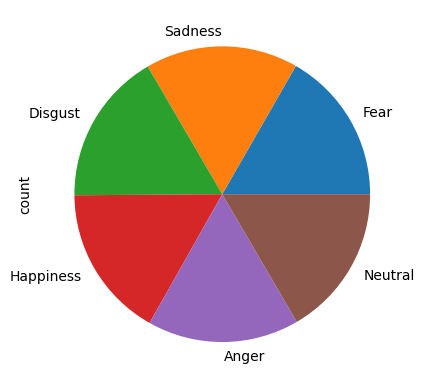

In [16]:
# LOOK AT DISTRIBUTION OF CLASSES
df.emotion.value_counts().plot(kind='pie')

In [17]:
ref=ref.groupby('emotion').head(150)
ref['emotion'].value_counts()

emotion
Fear         144
Sadness      144
Disgust      144
Happiness    144
Anger        143
Neutral      143
Name: count, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  862 non-null    object
 1   path     862 non-null    object
dtypes: object(2)
memory usage: 13.6+ KB


In [19]:
!pip install resampy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 10.7 MB/s eta 0:00:0000:010:01


In [20]:
import resampy
from resampy import resample
import librosa

In [36]:
# Note this takes a couple of minutes (~10 mins) as we're iterating over 4 datasets
df = pd.DataFrame(columns=['Features'])

# loop feature extraction over the entire dataset
counter=0
for index,path in enumerate(ref.path):
    try:
        X, sample_rate = librosa.load(path
                                      ,res_type='kaiser_fast'
                                      ,duration=3
                                      ,sr=44100
                                      ,offset=0.5
                                     )
        sample_rate = np.array(sample_rate)
        result = np.array([])

        # mean as the feature. Could do min and max etc as well.
        mfccs = np.mean(librosa.feature.mfcc(y=X,
                                            sr=sample_rate,
                                            n_mfcc=20),
                        axis=0)
        result=np.hstack((result, mfccs)) # stacking horizontally

        #get the mel-scaled spectrogram (ransform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.)
        spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000)
        db_spec = librosa.power_to_db(spectrogram)
        #temporally average spectrogram
        log_spectrogram = np.mean(db_spec, axis = 0)
        result=np.hstack((result, log_spectrogram)) # stacking horizontally

        # Chroma_stft
        stft = np.abs(librosa.stft(X))
        chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
        result = np.hstack((result, chroma_stft)) # stacking horizontally

        # Root Mean Square Value
        rms = np.mean(librosa.feature.rms(y=X).T, axis=0)
        result = np.hstack((result, rms)) # stacking horizontally

        df.loc[counter] = [result]
        counter=counter+1
    except ValueError as e:
        print(f"ValueError encountered for file {path}: {e}")
        pass

# Check a few records to make sure its processed successfully
print(len(df))
df.head()

ValueError encountered for file /kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Fear_C_A_hoy.wav: Input signal length=0 is too small to resample from 48000->44100
ValueError encountered for file /kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Neutral_C_A_si.wav: Input signal length=0 is too small to resample from 48000->44100
ValueError encountered for file /kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Sadness_M_A_no.wav: Input signal length=0 is too small to resample from 48000->44100
ValueError encountered for file /kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Neutral_F_B_barba.wav: Input signal length=0 is too small to resample from 48000->44100
ValueError encountered for file /kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Em

,Features
0,"[-9.596537590026855, -10.533646583557129, -12.225030899047852, -13.79308795928955, -20.202608108520508, -19.86011505126953, -22.189136505126953, -26.103315353393555, 0.6075640320777893, 0.6959041357040405, 0.8957762718200684, 0.9402642250061035, 0.7657712697982788, 0.8995503187179565, 0.968660831451416, 0.8324373960494995, 0.6694081425666809, 0.593110203742981, 0.5755212306976318, 0.6390974521636963, 0.021492579951882362]"
1,"[-18.450305938720703, -16.82522201538086, -16.414310455322266, -13.990710258483887, -11.990570068359375, -10.613717079162598, -11.283784866333008, -9.624059677124023, -9.528909683227539, -11.992366790771484, -15.143753051757812, -14.66172981262207, -15.182485580444336, -15.402572631835938, -14.998910903930664, -15.109164237976074, -14.319865226745605, -14.490511894226074, -10.606111526489258, -9.661734580993652, -11.767361640930176, -11.305193901062012, -9.150270462036133, -10.175525665283203, -10.814181327819824, -9.190404891967773, -9.383309364318848, -10.1621675491333, -13.304527282714844, -13.563217163085938, -9.4867525100708, -10.165071487426758, -13.188514709472656, -12.493062019348145, -10.906713485717773, -10.871719360351562, -32.35883712768555, -29.392179489135742, -28.756399154663086, -24.510805130004883, -18.924280166625977, -16.585474014282227, -13.03463363647461, -10.864129066467285, -13.550765991210938, -15.877669334411621, -18.053617477416992, -17.661808013916016, -17.83528709411621, -17.536962509155273, -17.73332977294922, -18.808475494384766, -18.917573928833008, -17.59115219116211, -15.358394622802734, -16.30690574645996, -19.925090789794922, -20.636762619018555, -21.946977615356445, -21.867477416992188, -19.74712371826172, -18.171707153320312, -17.798147201538086, -17.027469635009766, -17.49846839904785, -18.086652755737305, -17.97032928466797, -18.87999153137207, -19.981609344482422, -20.79546546936035, -21.8128604888916, -24.459524154663086, 0.5998318195343018, 0.5651247501373291, 0.43848374485969543, 0.28380876779556274, 0.21775341033935547, 0.23448525369167328, 0.3008202314376831, 0.3435989022254944, 0.3677820563316345, 0.3511599600315094, 0.4071718752384186, 0.5681726932525635, 0.24693375825881958]"
2,"[-4.4265666007995605, -6.699217319488525, -11.372706413269043, -11.584808349609375, -12.79326343536377, -11.383092880249023, -10.916060447692871, -11.587148666381836, -11.905370712280273, -10.982587814331055, -9.894689559936523, -10.607905387878418, -10.96272087097168, -10.989151954650879, -11.025331497192383, -10.900097846984863, -10.660283088684082, -10.957748413085938, -10.635268211364746, -10.865123748779297, -12.604005813598633, -11.212915420532227, -11.437826156616211, -11.56784439086914, -12.413723945617676, -12.988728523254395, -12.905299186706543, -12.15800952911377, -11.421942710876465, -13.17607307434082, -12.720314025878906, -10.636037826538086, -10.619653701782227, -10.901737213134766, -10.574838638305664, -10.158530235290527, -10.402263641357422, -9.652437210083008, -5.987053394317627, -4.1507768630981445, -6.368851661682129, -11.514245986938477, -10.634861946105957, -9.80310344696045, -7.799729824066162, -8.836694717407227, -11.420488357543945, -13.636189460754395, -14.182859420776367, -18.765960693359375, -31.63589859008789, -30.688499450683594, -30.191150665283203, -29.485374450683594, -28.43406105041504, -27.83311653137207, -27.18126678466797, -27.20623016357422, -25.78590965270996, -24.37635612487793, -23.644983291625977, -23.10915184020996, -22.216487884521484, -21.764820098876953, -20.474939346313477, -18.548736572265625, -19.269760131835938, -19.803035736083984, -18.115510940551758, -19.08338165283203, -18.836240768432617, -18.100465774536133, -18.259796142578125, -17.25299644470215, -16.152986526489258, -15.648786544799805, -15.088967323303223, -15.453537940979004, -15.396986961364746, -14.511303901672363, -14.589476585388184, -15.810117721557617, -15.399999618530273, -13.49569320678711, -12.624393463134766, -11.292171478271484, -11.316153526306152

In [37]:
# Now extract the mean bands to its own feature columns
df = pd.concat([ref,pd.DataFrame(df['Features'].values.tolist())],axis=1)
df[:5]

,emotion,path,0,1,2,3,4,5,6,7,...,355,356,357,358,359,360,361,362,363,364
0,Fear,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Fear_C_A_detras.wav,-9.596538,-10.533647,-12.225031,-13.793088,-20.202608,-19.860115,-22.189137,-26.103315,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sadness,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Sadness_C_B_explosivo.wav,-18.450306,-16.825222,-16.414310,-13.990710,-11.990570,-10.613717,-11.283785,-9.624060,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Anger,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Anger_C_A_por_favor.wav,-4.426567,-6.699217,-11.372706,-11.584808,-12.793263,-11.383093,-10.916060,-11.587149,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Neutral,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Neutral_F_B_contrario.wav,-2.686561,-4.857210,-9.195910,-9.258016,-9.576130,-9.258322,-9.296251,-9.255982,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Anger,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Anger_M_B_disputa.wav,-11.963666,-12.391003,-19.036823,-20.984835,0.810723,0.657833,0.650762,0.616653,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# replace NA with 0
df=df.fillna(0)
print(df.shape)
df[:5]

(862, 367)


,emotion,path,0,1,2,3,4,5,6,7,...,355,356,357,358,359,360,361,362,363,364
0,Fear,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Fear_C_A_detras.wav,-9.596538,-10.533647,-12.225031,-13.793088,-20.202608,-19.860115,-22.189137,-26.103315,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Sadness,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Sadness_C_B_explosivo.wav,-18.450306,-16.825222,-16.414310,-13.990710,-11.990570,-10.613717,-11.283785,-9.624060,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Anger,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Anger_C_A_por_favor.wav,-4.426567,-6.699217,-11.372706,-11.584808,-12.793263,-11.383093,-10.916060,-11.587149,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Neutral,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Neutral_F_B_contrario.wav,-2.686561,-4.857210,-9.195910,-9.258016,-9.576130,-9.258322,-9.296251,-9.255982,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Anger,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Anger_M_B_disputa.wav,-11.963666,-12.391003,-19.036823,-20.984835,0.810723,0.657833,0.650762,0.616653,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# Split between train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','emotion'],axis=1)
                                                    , df.emotion
                                                    , test_size=0.20
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation
X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
176,-0.986167,-2.213429,-4.277918,-5.010901,-2.431888,-3.355803,-7.261568,-8.150040,-9.790506,-9.148252,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581,-2.215230,-4.388774,-14.207514,-14.304663,-12.652043,-9.328258,-9.535909,-12.027822,-11.947382,-8.882535,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
814,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
163,-3.079925,-6.391231,-12.996933,-12.372557,-12.403203,-13.634962,-14.045456,-12.718870,-11.405726,-4.593223,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
248,-11.212600,-8.082983,-10.107992,-12.515559,-13.877894,-13.755005,-14.084846,-12.960047,-13.740132,-13.377075,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
762,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74,-3.172302,-5.563421,-17.387207,-15.552012,-15.311380,-14.992323,-16.786800,-15.998868,-14.189444,-13.195378,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
113,-2.221891,-5.325556,-9.840505,-10.880659,-12.213449,-11.006872,-11.489840,-12.548187,-12.490404,-13.734998,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
578,-7.466036,-7.098920,-8.471918,-20.995298,-19.130888,-21.781605,0.718821,0.745316,0.784536,0.717039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:

# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

print(X_train.shape)
print(X_test.shape)

[[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]]
(689, 365, 1)
(173, 365, 1)


In [41]:
lb.classes_

array(['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness'],
      dtype=object)

In [43]:
# ITERATE OVER ALL AUDIO FILES AND EXTRACT LOG MEL SPECTROGRAM MEAN VALUES INTO DF FOR MODELING
import pandas as pd
df_mel = pd.DataFrame(columns=['mel_spectrogram'])

counter=0

for index,path in enumerate(ref.path):
    try:
        
        X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)

        #get the mel-scaled spectrogram (ransform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.)
        spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000)
        db_spec = librosa.power_to_db(spectrogram)
        #temporally average spectrogram
        log_spectrogram = np.mean(db_spec, axis = 0)

        # Mel-frequency cepstral coefficients (MFCCs)
    #     mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
    #     mfcc=np.mean(mfcc,axis=0)

        # compute chroma energy (pertains to 12 different pitch classes)
    #     chroma = librosa.feature.chroma_stft(y=X, sr=sample_rate)
    #     chroma = np.mean(chroma, axis = 0)

        # compute spectral contrast
    #     contrast = librosa.feature.spectral_contrast(y=X, sr=sample_rate)
    #     contrast = np.mean(contrast, axis= 0)

        # compute zero-crossing-rate (zcr:the zcr is the rate of sign changes along a signal i.e.m the rate at
    #     which the signal changes from positive to negative or back - separation of voiced andunvoiced speech.)
    #     zcr = librosa.feature.zero_crossing_rate(y=X)
    #     zcr = np.mean(zcr, axis= 0)

        df_mel.loc[counter] = [log_spectrogram]
        counter=counter+1
    except ValueError as e:
        print(f"ValueError encountered for file {path}: {e}")
        pass

print(len(df_mel))
df_mel.head()

ValueError encountered for file /kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Fear_C_A_hoy.wav: Input signal length=0 is too small to resample from 48000->44100
ValueError encountered for file /kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Neutral_C_A_si.wav: Input signal length=0 is too small to resample from 48000->44100
ValueError encountered for file /kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Sadness_M_A_no.wav: Input signal length=0 is too small to resample from 48000->44100
ValueError encountered for file /kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Neutral_F_B_barba.wav: Input signal length=0 is too small to resample from 48000->44100
ValueError encountered for file /kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Em

,mel_spectrogram
0,"[-20.202608, -19.860115, -22.189137, -26.103315]"
1,"[-32.358837, -29.39218, -28.7564, -24.510805, -18.92428, -16.585474, -13.034634, -10.864129, -13.550766, -15.877669, -18.053617, -17.661808, -17.835287, -17.536963, -17.73333, -18.808475, -18.917574, -17.591152, -15.358395, -16.306906, -19.92509, -20.636763, -21.946978, -21.867477, -19.747124, -18.171707, -17.798147, -17.02747, -17.498468, -18.086653, -17.97033, -18.879992, -19.98161, -20.795465, -21.81286, -24.459524]"
2,"[-14.182859, -18.76596, -31.635899, -30.6885, -30.19115, -29.485374, -28.434061, -27.833117, -27.181267, -27.20623, -25.78591, -24.376356, -23.644983, -23.109152, -22.216488, -21.76482, -20.47494, -18.548737, -19.26976, -19.803036, -18.11551, -19.083382, -18.83624, -18.100466, -18.259796, -17.252996, -16.152987, -15.648787, -15.088967, -15.453538, -15.396987, -14.511304, -14.589477, -15.810118, -15.4, -13.495693, -12.624393, -11.2921715, -11.316154, -11.604284, -12.808111, -15.038826, -16.51493, -18.076674, -19.709734, -21.547808, -23.838373, -27.367111]"
3,"[-21.37428, -18.899403, -20.010752, -21.770882, -22.701685, -23.939764, -25.842957, -28.117382]"
4,"[-19.036823, -20.984835]"


In [44]:
# Now extract the mean bands to its own feature columns
df = pd.concat([ref,pd.DataFrame(df_mel['mel_spectrogram'].values.tolist())],axis=1)
df[:5]

,emotion,path,0,1,2,3,4,5,6,7,...,166,167,168,169,170,171,172,173,174,175
0,Fear,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Fear_C_A_detras.wav,-20.202608,-19.860115,-22.189137,-26.103315,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sadness,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Sadness_C_B_explosivo.wav,-32.358837,-29.392179,-28.756399,-24.510805,-18.924280,-16.585474,-13.034634,-10.864129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Anger,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Anger_C_A_por_favor.wav,-14.182859,-18.765961,-31.635899,-30.688499,-30.191151,-29.485374,-28.434061,-27.833117,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Neutral,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Neutral_F_B_contrario.wav,-21.374281,-18.899403,-20.010752,-21.770882,-22.701685,-23.939764,-25.842957,-28.117382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Anger,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Anger_M_B_disputa.wav,-19.036823,-20.984835,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# Split between train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','emotion'],axis=1)
                                                    , df.emotion
                                                    , test_size=0.20
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation
X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,166,167,168,169,170,171,172,173,174,175
176,-22.586901,-21.459839,-22.659689,-21.179878,-19.996048,-21.415783,-21.363218,-23.182161,-26.279348,-27.245453,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
581,-3.522213,-5.349842,-11.127224,-10.521092,-10.362947,-11.527115,-13.883810,-19.238214,-20.974174,-16.117813,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,-4.593223,-7.694539,-15.033620,-18.328577,-21.870893,-25.662296,-29.750381,-31.765268,-35.310062,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248,-19.799494,-16.901714,-17.061281,-18.301510,-19.572474,-20.187870,-20.848438,-20.724907,-21.659082,-22.261049,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,-2.453673,-5.228367,-12.885202,-13.108340,-12.817931,-12.571348,-12.933213,-13.397606,-13.203336,-13.577493,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,-5.547216,-9.113906,-17.465538,-18.163029,-18.756809,-19.998163,-21.300196,-23.350046,-23.885490,-24.586908,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
578,-20.995298,-19.130888,-21.781605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:

# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

print(X_train.shape)
print(X_test.shape)

[[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]]
(689, 176, 1)
(173, 176, 1)


In [47]:
data_path = pd.concat([df], axis = 0)
# data_path.to_csv(csv_path,index=False)
data_path.head()

,emotion,path,0,1,2,3,4,5,6,7,...,166,167,168,169,170,171,172,173,174,175
0,Fear,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Fear_C_A_detras.wav,-20.202608,-19.860115,-22.189137,-26.103315,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sadness,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Sadness_C_B_explosivo.wav,-32.358837,-29.392179,-28.756399,-24.510805,-18.924280,-16.585474,-13.034634,-10.864129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Anger,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Anger_C_A_por_favor.wav,-14.182859,-18.765961,-31.635899,-30.688499,-30.191151,-29.485374,-28.434061,-27.833117,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Neutral,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Neutral_F_B_contrario.wav,-21.374281,-18.899403,-20.010752,-21.770882,-22.701685,-23.939764,-25.842957,-28.117382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Anger,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Anger_M_B_disputa.wav,-19.036823,-20.984835,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

In [49]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(y=data, rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data,sr=sampling_rate,n_steps=pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.path)[1]
data, sample_rate = librosa.load(path)

In [50]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate,n_mfcc=13).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

In [51]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    result = np.array([])

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically

    return result

In [53]:
X, Y = [], []
for path, emotion in zip(df.path, df.emotion):
    try:
        feature = get_features(path)
        for ele in feature:
            X.append(ele)
            # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
            Y.append(emotion)
    except ValueError as e:
        print(f"ValueError encountered for file {path}: {e}")
        pass

ValueError encountered for file /kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Fear_C_A_detras.wav: can't extend empty axis 0 using modes other than 'constant' or 'empty'
ValueError encountered for file /kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Neutral_F_B_contrario.wav: can't extend empty axis 0 using modes other than 'constant' or 'empty'
ValueError encountered for file /kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Anger_M_B_disputa.wav: can't extend empty axis 0 using modes other than 'constant' or 'empty'
ValueError encountered for file /kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Happiness_M_A_ayer.wav: can't extend empty axis 0 using modes other than 'constant' or 'empty'
ValueError encountered for file /kaggle/input/mexican-emotional-speec

In [54]:
len(X), len(Y), data_path.path.shape

(1659, 1659, (862,))

In [55]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,labels
0,0.026123,0.606637,0.495331,0.499042,0.226888,0.122772,0.102556,0.140929,0.160634,0.155320,...,0.001846,0.001205,0.000829,0.000217,0.000105,0.000272,0.000408,0.000360,0.000029,Sadness
1,0.030448,0.615511,0.508464,0.519530,0.254159,0.146738,0.124340,0.154061,0.175145,0.170807,...,0.007318,0.007178,0.006127,0.006215,0.005421,0.005108,0.005706,0.005852,0.005222,Sadness
2,0.034898,0.637277,0.536623,0.600499,0.314439,0.144429,0.107676,0.155043,0.211214,0.153638,...,0.002464,0.001562,0.000604,0.000515,0.000210,0.000052,0.000055,0.000071,0.000009,Sadness
3,0.051294,0.457845,0.338454,0.302083,0.291697,0.315368,0.232906,0.208665,0.277411,0.319070,...,0.000217,0.000137,0.000086,0.000056,0.000047,0.000037,0.000028,0.000014,0.000002,Anger
4,0.051880,0.457883,0.338768,0.302354,0.292621,0.317242,0.233824,0.207944,0.277155,0.319252,...,0.000265,0.000172,0.000135,0.000092,0.000092,0.000082,0.000085,0.000058,0.000044,Anger


In [56]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

X = Features.iloc[: ,:-1].values
Y = Features['labels'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.20, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

# NORMALIZE DATA
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)
x_train = (x_train - mean)/std
x_test = (x_test - mean)/std

# TURN DATA INTO ARRAYS FOR KERAS
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR
x_train = x_train[:,:,np.newaxis]
x_test = x_test[:,:,np.newaxis]

print(x_train.shape)
print(x_test.shape)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=2, shuffle=True)
acc_per_fold = []
loss_per_fold = []
inputs = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)
inputs.shape
targets.shape

[[0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]
(1327, 155, 1)
(332, 155, 1)


(1659, 6)

In [57]:
lb.classes_

array(['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness'],
      dtype=object)

In [58]:
#Accuarte class labels

In [59]:
data_path = pd.concat([df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head(50)

,emotion,path,0,1,2,3,4,5,6,7,...,166,167,168,169,170,171,172,173,174,175
0,Fear,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Fear_C_A_detras.wav,-20.202608,-19.860115,-22.189137,-26.103315,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sadness,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Sadness_C_B_explosivo.wav,-32.358837,-29.392179,-28.756399,-24.510805,-18.924280,-16.585474,-13.034634,-10.864129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Anger,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Anger_C_A_por_favor.wav,-14.182859,-18.765961,-31.635899,-30.688499,-30.191151,-29.485374,-28.434061,-27.833117,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Neutral,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Neutral_F_B_contrario.wav,-21.374281,-18.899403,-20.010752,-21.770882,-22.701685,-23.939764,-25.842957,-28.117382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Anger,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Anger_M_B_disputa.wav,-19.036823,-20.984835,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Disgust,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Disgust_C_B_delincuencia.wav,-21.515018,-26.619612,-35.558968,-35.591270,-27.736671,-15.915005,-14.334942,-21.302582,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Happiness,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Happiness_M_A_ayer.wav,-28.272135,-25.471706,-26.137794,-26.926378,-28.916090,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Happiness,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Happiness_M_A_izquierda.wav,-17.071850,-15.409379,-14.390215,-13.980208,-13.887756,-12.815509,-11.875665,-12.526837,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Anger,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Anger_C_B_furia.wav,-13.610137,-14.892427,-17.728411,-19.287247,-23.053097,-27.220924,-29.771132,-29.451397,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Fear,/kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Fear_C_A_hoy.wav,-13.031639,-15.969558,-21.807091,-21.718246,-16.426960,-13.044312,-10.944352,-8.169141,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

In [61]:
def noise(data):
    noise_amp = 0.015*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(y=data,rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data,sr=sampling_rate,n_steps=pitch_factor)

def pitch2(data, sampling_rate, pitch_factor=0.6):
    return librosa.effects.pitch_shift(y=data,sr=sampling_rate,n_steps=pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.path)[1]
data, sample_rate = librosa.load(path)

In [62]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate,n_mfcc=13).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

In [63]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    result = np.array([])

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch2(new_data, sample_rate)
    res4 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res4)) # stacking vertically

    return result

In [65]:
X, Y = [], []
for path, emotion in zip(df.path, df.emotion):
    try:
        feature = get_features(path)
        for ele in feature:
            X.append(ele)
            # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
            Y.append(emotion)
    except ValueError as e:
        print(f"ValueError encountered for file {path}: {e}")
        pass

ValueError encountered for file /kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Fear_C_A_detras.wav: can't extend empty axis 0 using modes other than 'constant' or 'empty'
ValueError encountered for file /kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Neutral_F_B_contrario.wav: can't extend empty axis 0 using modes other than 'constant' or 'empty'
ValueError encountered for file /kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Anger_M_B_disputa.wav: can't extend empty axis 0 using modes other than 'constant' or 'empty'
ValueError encountered for file /kaggle/input/mexican-emotional-speech-databasemesd/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/Happiness_M_A_ayer.wav: can't extend empty axis 0 using modes other than 'constant' or 'empty'
ValueError encountered for file /kaggle/input/mexican-emotional-speec

In [66]:
len(X), len(Y), data_path.path.shape

(2212, 2212, (862,))

In [67]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,labels
0,0.026123,0.606637,0.495331,0.499042,0.226888,0.122772,0.102556,0.140929,0.160634,0.155320,...,0.001846,0.001205,0.000829,0.000217,0.000105,0.000272,0.000408,0.000360,0.000029,Sadness
1,0.033238,0.616046,0.514145,0.522010,0.254562,0.153739,0.132524,0.158420,0.179482,0.175477,...,0.009631,0.008498,0.009074,0.008019,0.007714,0.008251,0.007773,0.007769,0.007576,Sadness
2,0.034898,0.637277,0.536623,0.600499,0.314439,0.144429,0.107676,0.155043,0.211214,0.153638,...,0.002464,0.001562,0.000604,0.000515,0.000210,0.000052,0.000055,0.000071,0.000009,Sadness
3,0.034783,0.627981,0.578979,0.604412,0.367398,0.152339,0.107992,0.142658,0.212911,0.151024,...,0.002087,0.001275,0.000591,0.000464,0.000158,0.000042,0.000074,0.000076,0.000011,Sadness
4,0.051294,0.457845,0.338454,0.302083,0.291697,0.315368,0.232906,0.208665,0.277411,0.319070,...,0.000217,0.000137,0.000086,0.000056,0.000047,0.000037,0.000028,0.000014,0.000002,Anger


In [68]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

X = Features.iloc[: ,:-1].values
Y = Features['labels'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.20, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

# NORMALIZE DATA
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)
x_train = (x_train - mean)/std
x_test = (x_test - mean)/std

# TURN DATA INTO ARRAYS FOR KERAS
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR
x_train = x_train[:,:,np.newaxis]
x_test = x_test[:,:,np.newaxis]

print(x_train.shape)
print(x_test.shape)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=2, shuffle=True)
acc_per_fold = []
loss_per_fold = []
inputs = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)
inputs.shape
targets.shape



[[0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]
(1769, 155, 1)
(443, 155, 1)


(2212, 6)

In [69]:
lb.classes_

array(['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness'],
      dtype=object)

In [70]:
import random
#########################################################################
### Model average / sum Ensemble
# Simple sum of all outputs / predictions and argmax across all classes
########
from keras.models import load_model
from sklearn.metrics import accuracy_score

model1 = load_model('/kaggle/input/german-model/german_models/model1-emo-db.weights.h5')
model2 = load_model('/kaggle/input/german-model/german_models/model2-emo-db.weights.h5')
model3 = load_model('/kaggle/input/german-model/german_models/model3-emo-db.weights.h5')

models = [model1, model2, model3]

preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)

# argmax across classes
ensemble_prediction = np.argmax(summed, axis=1)

prediction1 = np.argmax(model1.predict(x_test), axis=1)
prediction2 = np.argmax(model2.predict(x_test), axis=1)
prediction3 = np.argmax(model3.predict(x_test), axis=1)

accuracy1 = accuracy_score(np.argmax(y_test, axis=1), prediction1)
accuracy2 = accuracy_score(np.argmax(y_test, axis=1), prediction2)
accuracy3 = accuracy_score(np.argmax(y_test, axis=1), prediction3)
ensemble_accuracy = accuracy_score(np.argmax(y_test, axis=1), ensemble_prediction)

print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

########################################
#Weighted average ensemble
models = [model1, model2, model3]
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
weights = [0.4, 0.2, 0.4]

#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), weighted_ensemble_prediction)
print('Weighted average method')
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)

########################################
#Grid search for the best combination of w1, w2, w3 that gives maximum acuracy
models = [model1, model2, model3]
preds1 = [model.predict(x_test) for model in models]
preds1=np.array(preds1)

import pandas as pd
df = pd.DataFrame([])

for w1 in range(0, 5):
    for w2 in range(0,5):
        for w3 in range(0,5):
            wts = [w1/10.,w2/10.,w3/10.]
            wted_preds1 = np.tensordot(preds1, wts, axes=((0),(0)))
            wted_ensemble_pred = np.argmax(wted_preds1, axis=1)
            weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), wted_ensemble_pred)
            df = pd.concat([df, pd.DataFrame({'wt1':wts[0],'wt2':wts[1],
                                         'wt3':wts[2], 'acc':weighted_accuracy*100}, index=[0])], ignore_index=True)

max_acc_row = df.iloc[df['acc'].idxmax()]
print("Max accuracy of ", max_acc_row[3], " obained with w1=", max_acc_row[0],
      " w2=", max_acc_row[1], " and w3=", max_acc_row[2])




###########################################################################
### Explore metrics for the ideal weighted ensemble model.

models = [model1, model2, model3]
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
ideal_weights = [0.4, 0.1, 0.2]

#Use tensordot to sum the products of all elements over specified axes.
ideal_weighted_preds = np.tensordot(preds, ideal_weights, axes=((0),(0)))
ideal_weighted_ensemble_prediction = np.argmax(ideal_weighted_preds, axis=1)

ideal_weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)


# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# #Print confusion matrix
# cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
# cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])

# fig, ax = plt.subplots(figsize=(12,12))
# sns.set(font_scale=1.6)
# sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

# # CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
# cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
# plt.figure(figsize = (9,7))
# plt.rcParams['figure.dpi'] = 125
# cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
# ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.6, top - 0.6)
# plt.title('Confusion Matrix', size=20)
# plt.xlabel('Predicted Classes', size=15)
# plt.ylabel('True Classes', size=15)
# plt.savefig('emo-db-model-2.png')
# plt.show()

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
Accuracy Score for model1 =  0.16930022573363432
Accuracy Score for model2 =  0.1580135440180587
Accuracy Score for model3 =  0.1489841986455982
Accuracy Score for average ensemble =  0.14446952595936793
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
Weighted average method
Accuracy Score for model1 =  0.16930022573363432
Accuracy Score for model2 =  0.1580135440180587
Accuracy Score for model3 =  0.1489841986455982
Accuracy Score for average ensemble =  0.14446952595936793
Accuracy Score for weighted average ensemble =  0.15349887133182843
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
Max accuracy of  

In [71]:
#Weighted average ensemble
models = [model1, model2, model3]
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
weights = [0.3, 0.1, 0.3]

#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), weighted_ensemble_prediction)
print('Weighted average method')
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)


# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# #Print confusion matrix
# cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
# cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])

# fig, ax = plt.subplots(figsize=(12,12))
# sns.set(font_scale=1.6)
# sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

# # CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
# cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
# plt.figure(figsize = (9,7))
# plt.rcParams['figure.dpi'] = 125
# cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
# ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.6, top - 0.6)
# plt.title('Confusion Matrix', size=20)
# plt.xlabel('Predicted Classes', size=15)
# plt.ylabel('True Classes', size=15)
# plt.savefig('SAVEE-EMSEMBLE.png')
# plt.show()

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step
Weighted average method
Accuracy Score for model1 =  0.16930022573363432
Accuracy Score for model2 =  0.1580135440180587
Accuracy Score for model3 =  0.1489841986455982
Accuracy Score for average ensemble =  0.14446952595936793
Accuracy Score for weighted average ensemble =  0.15349887133182843
